<a href="https://colab.research.google.com/github/jason96819/Classification-of-soccer-player-types/blob/main/Data%20collection%2C%20refining%2C%20and%20preprocessing/9_0_%EB%B6%84%EB%A5%98%ED%95%99%EC%8A%B5_%EA%B3%A8%EA%B8%B0%ED%8D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('22_21_20_player_role.csv')
df.columns

Index(['Unnamed: 0', '년도', '클럽명', '선수명', '출전시간', '득점', '도움', '슈팅', '스로인',
       '드리블 시도', '키패스', '전방 패스 시도', '횡패스 시도', '공격지역패스 시도', '수비지역패스 시도',
       '중앙지역패스 시도', '롱패스', '숏패스 시도', '크로스 시도', '경합 지상 시도', '경합 공중 시도', '태클 시도',
       '클리어링', '인터셉트', '차단', '블락', '파울', '피파울', 'Position', 'Role',
       'Detailed Role'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 0', '년도', '클럽명', '선수명'])
#df = df[['출전시간', '득점', '도움', '슈팅', '스로인', '드리블 시도', '키패스', '전방 패스 시도', '횡패스 시도', '공격지역패스 시도', '수비지역패스 시도', '중앙지역패스 시도',
#            '롱패스', '숏패스 시도', '크로스 시도', '경합 지상 시도', '경합 공중 시도', '태클 시도', '클리어링', '인터셉트', '차단', '블락', '파울', '피파울', 'Position', 'Role', 'Detailed Role']]
df.columns = ['Time', 'Goal', 'Ass', 'Shoot', 'Throw', 'Dribble', 'KPass', 'FP', 'CP', 'AP', 'DP', 'MP', 'LP', 'SP', 'Cross', 'RG', 'RS', 'Takkle', 'Clearing', 'Intercept', 'Cut', 'Block', 'Foul', 'Fouled', 'Position', 'Role', 'Detailed Role']
df

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,...,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled,Position,Role,Detailed Role
0,386,3,0,11,3,16,1,24,48,46,...,10,3,6,6,8,11,10,FW,WF,Wide Threat
1,541,1,0,6,0,3,4,69,44,42,...,13,9,14,14,15,11,10,MF,CAM,Box crasher
2,3287,12,13,64,5,46,78,293,432,510,...,83,22,35,29,45,23,20,FW,WF,Wide Threat
3,2941,0,1,21,0,7,9,392,585,188,...,73,116,100,74,96,38,34,MF,CAM,Box crasher
4,694,0,1,9,1,5,4,166,132,90,...,19,10,22,14,18,11,17,MF,CDM,Box to Box
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,285,0,1,0,16,2,4,104,70,47,...,1,5,3,12,2,2,3,DF,FB,Progressor
1697,1671,5,6,27,0,35,30,146,264,300,...,13,6,29,30,0,29,20,FW,WF,Outlet
1698,2456,1,0,11,2,1,4,581,532,19,...,22,72,53,134,15,42,18,DF,CB,SCB
1699,624,0,0,1,46,3,0,161,90,74,...,2,4,7,19,0,15,8,DF,FB,Progressor


In [ ]:
GK = df[df['Position'] == 'GK']
GK

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,...,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled,Position,Role,Detailed Role
14,3341,0,0,0,0,0,0,689,76,0,...,1,41,148,3,6,0,9,GK,GK,Goalkeeper
27,2216,0,0,0,0,0,0,463,181,0,...,1,16,101,1,4,2,5,GK,GK,Goalkeeper
47,1737,0,0,0,0,0,0,358,218,0,...,1,30,66,1,4,1,2,GK,GK,Goalkeeper
55,480,0,0,0,0,0,0,81,34,0,...,0,7,19,0,0,0,0,GK,GK,Goalkeeper
71,686,0,0,0,0,0,0,93,136,0,...,0,7,25,1,0,0,1,GK,GK,Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,2592,0,0,0,0,0,0,466,133,0,...,2,13,6,8,0,0,2,GK,GK,Goalkeeper
1645,2408,0,0,1,0,0,0,570,107,0,...,1,19,4,4,0,0,4,GK,GK,Swiper goalkeeper
1660,865,0,0,0,0,0,0,198,16,0,...,0,4,0,1,0,0,0,GK,GK,Goalkeeper
1676,1729,0,0,0,0,0,1,386,18,0,...,1,17,6,6,0,1,2,GK,GK,Goalkeeper


In [ ]:
X = GK.iloc[:, :-3]
X = X.reset_index(drop=True)
X

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,...,Cross,RG,RS,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled
0,3341,0,0,0,0,0,0,689,76,0,...,0,1,0,1,41,148,3,6,0,9
1,2216,0,0,0,0,0,0,463,181,0,...,0,0,0,1,16,101,1,4,2,5
2,1737,0,0,0,0,0,0,358,218,0,...,0,1,0,1,30,66,1,4,1,2
3,480,0,0,0,0,0,0,81,34,0,...,0,0,0,0,7,19,0,0,0,0
4,686,0,0,0,0,0,0,93,136,0,...,0,0,0,0,7,25,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2592,0,0,0,0,0,0,466,133,0,...,0,1,0,2,13,6,8,0,0,2
133,2408,0,0,1,0,0,0,570,107,0,...,0,1,1,1,19,4,4,0,0,4
134,865,0,0,0,0,0,0,198,16,0,...,0,0,0,0,4,0,1,0,0,0
135,1729,0,0,0,0,0,1,386,18,0,...,0,1,0,1,17,6,6,0,1,2


In [ ]:
y = GK['Detailed Role']
y

14             Goalkeeper
27             Goalkeeper
47             Goalkeeper
55             Goalkeeper
71             Goalkeeper
              ...        
1627           Goalkeeper
1645    Swiper goalkeeper
1660           Goalkeeper
1676           Goalkeeper
1681           Goalkeeper
Name: Detailed Role, Length: 137, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 타겟 데이터의 라벨인코딩 - 머신러닝
le = LabelEncoder()
y_la_en = le.fit_transform(y)
y_la_en[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# 타겟 데이터의 원-핫 인코딩 - 딥러닝
y_onehot = pd.get_dummies(y).values
y_onehot[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
for i in range(len(X)):
    x = X.Time[i] / 60
    X.iloc[i, :] /= x
X = X.drop(columns=['Time'])
X

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,DP,...,Cross,RG,RS,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,12.373541,1.364861,0.0,13.648608,...,0.0,0.017959,0.000000,0.017959,0.736306,2.657887,0.053876,0.107752,0.000000,0.161628
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,12.536101,4.900722,0.0,17.274368,...,0.0,0.000000,0.000000,0.027076,0.433213,2.734657,0.027076,0.108303,0.054152,0.135379
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,12.366149,7.530225,0.0,19.723661,...,0.0,0.034542,0.000000,0.034542,1.036269,2.279793,0.034542,0.138169,0.034542,0.069085
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,10.125000,4.250000,0.0,14.250000,...,0.0,0.000000,0.000000,0.000000,0.875000,2.375000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.000000,8.134111,11.895044,0.0,20.029155,...,0.0,0.000000,0.000000,0.000000,0.612245,2.186589,0.087464,0.000000,0.000000,0.087464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.0,0.000000,0.000000,0.0,0.0,0.000000,10.787037,3.078704,0.0,13.842593,...,0.0,0.023148,0.000000,0.046296,0.300926,0.138889,0.185185,0.000000,0.000000,0.046296
133,0.0,0.000000,0.024917,0.0,0.0,0.000000,14.202658,2.666113,0.0,16.644518,...,0.0,0.024917,0.024917,0.024917,0.473422,0.099668,0.099668,0.000000,0.000000,0.099668
134,0.0,0.000000,0.000000,0.0,0.0,0.000000,13.734104,1.109827,0.0,14.497110,...,0.0,0.000000,0.000000,0.000000,0.277457,0.000000,0.069364,0.000000,0.000000,0.000000
135,0.0,0.000000,0.000000,0.0,0.0,0.034702,13.395026,0.624639,0.0,13.811452,...,0.0,0.034702,0.000000,0.034702,0.589936,0.208213,0.208213,0.000000,0.034702,0.069404


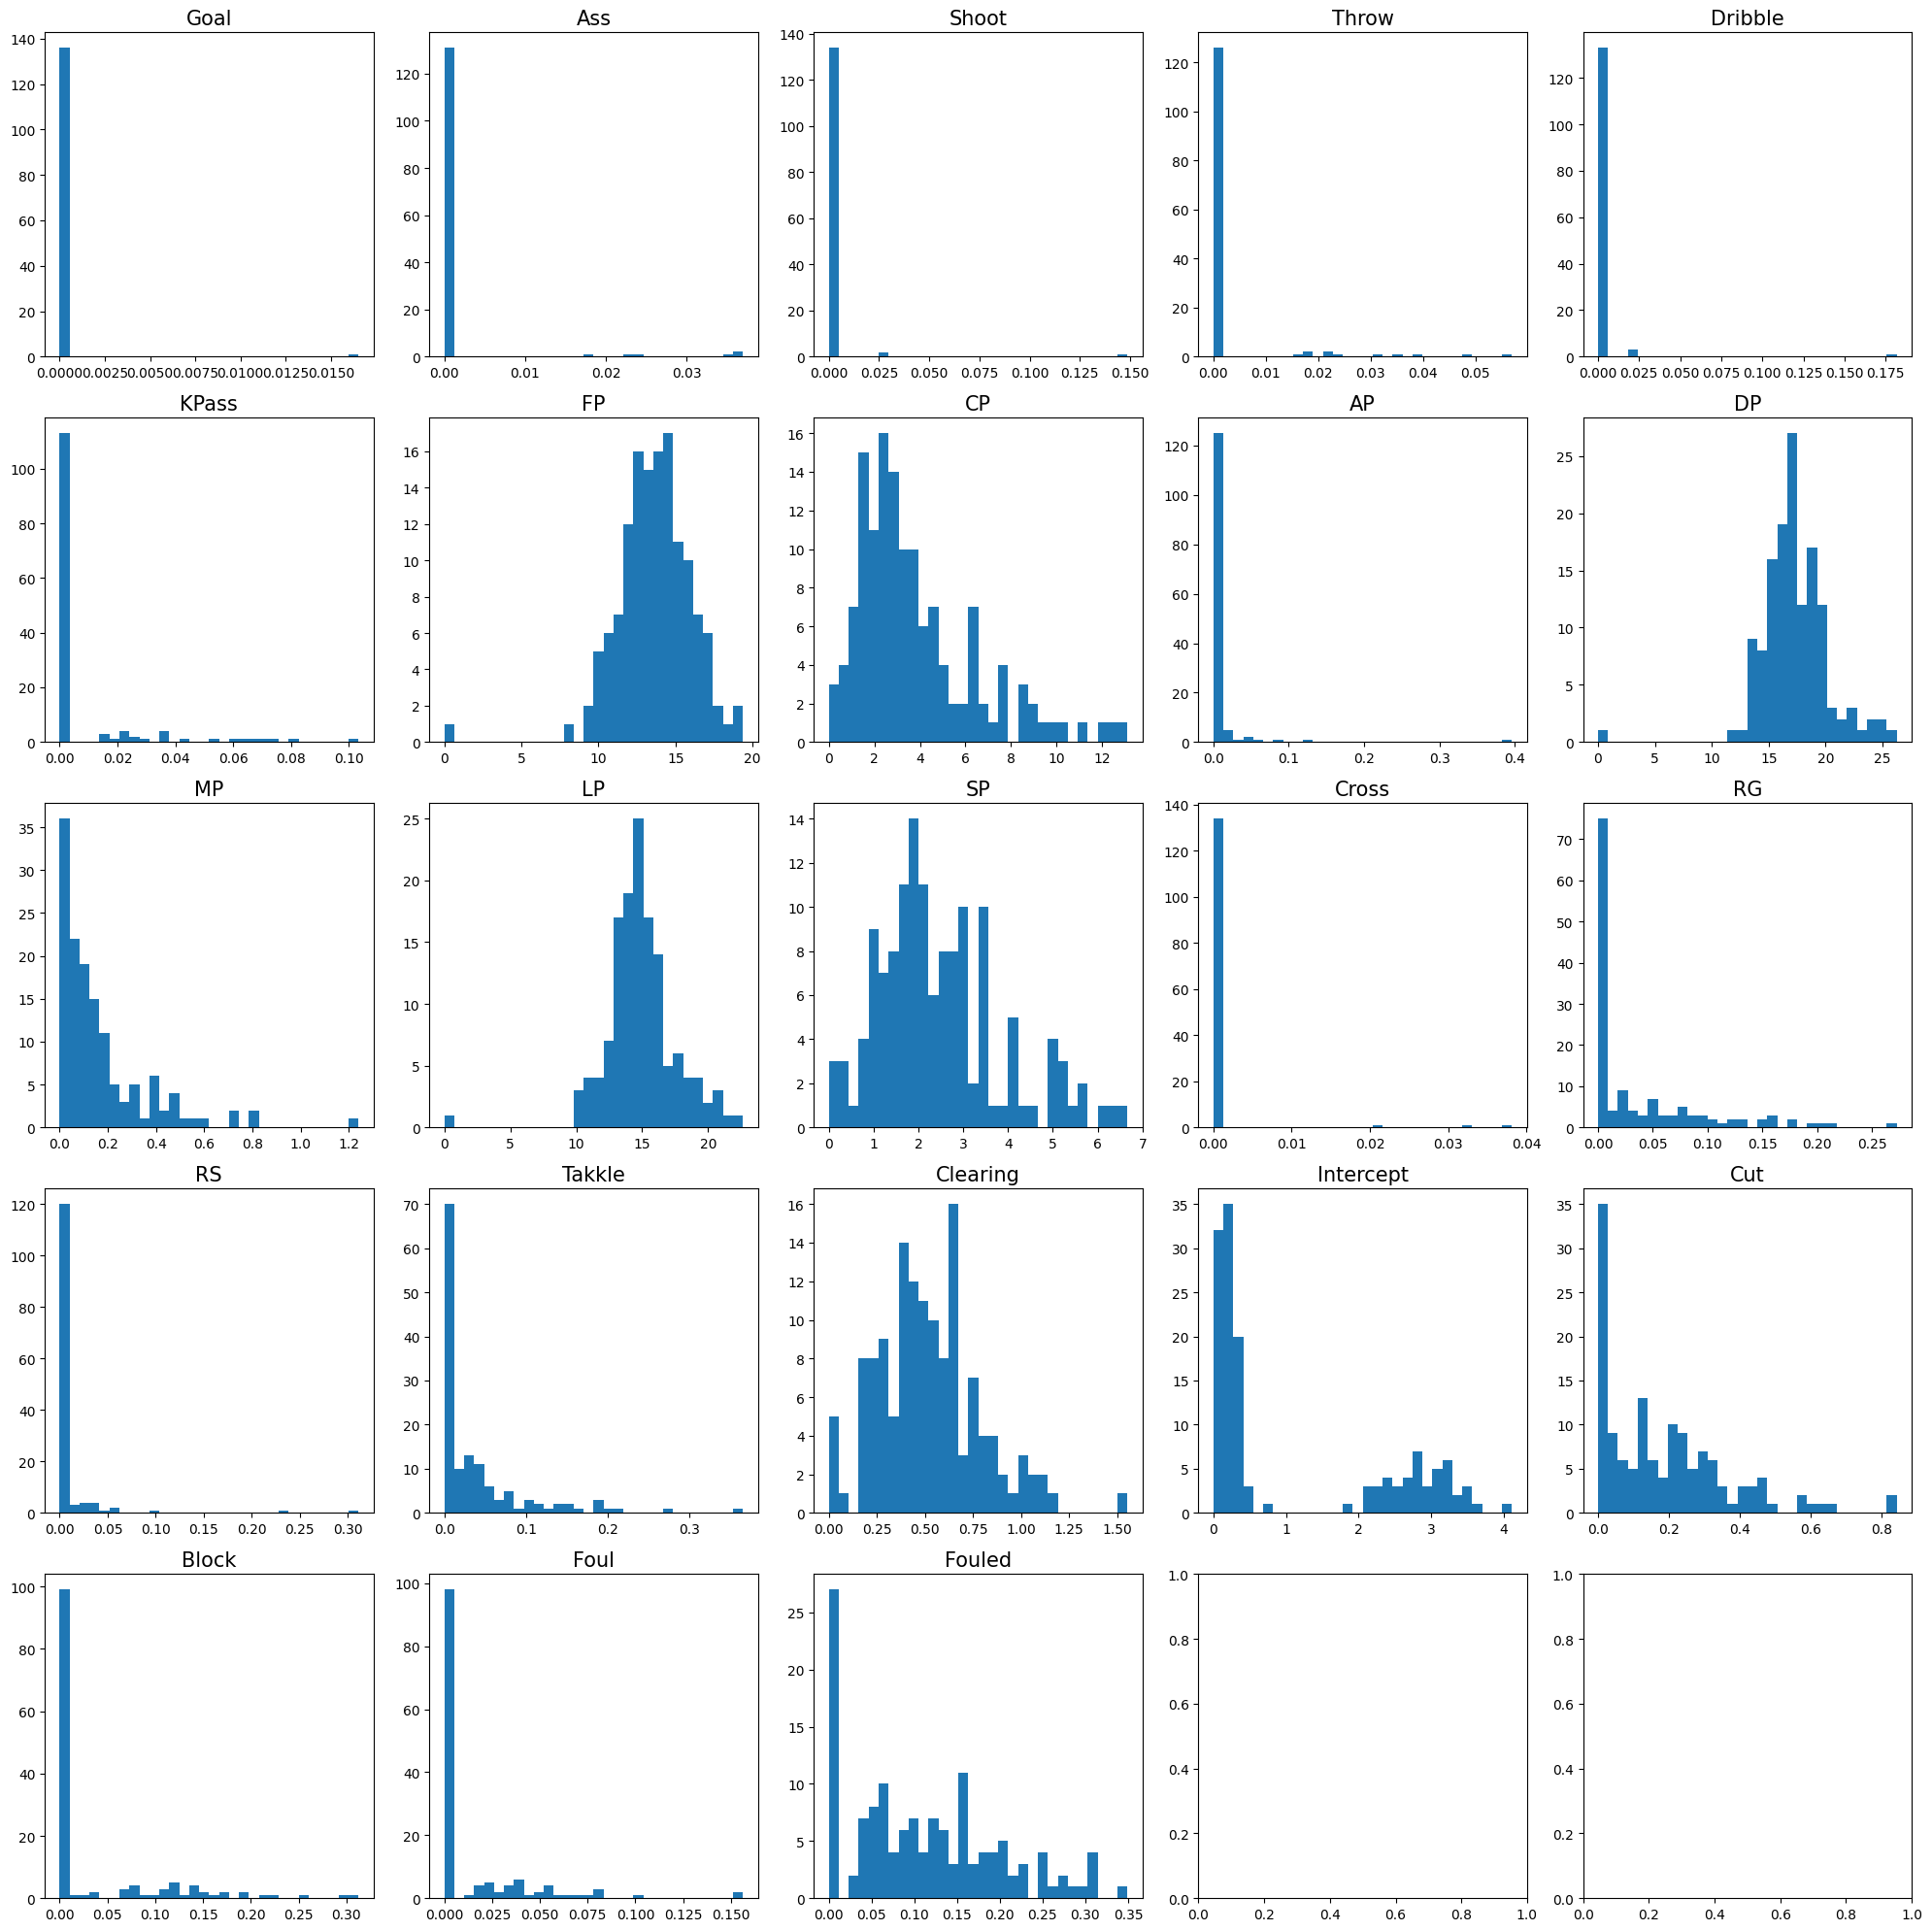

In [ ]:
# subplot 그리기
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# 각 subplot에 데이터 분포 그리기
for i, ax in enumerate(axs.flatten()):
    if i < len(X.columns):
        ax.hist(X.iloc[:, i], bins=30)
        ax.set_title(X.columns[i], fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# 제곱근 변환 함수 정의
def sqrt_transform(x):
    return np.sqrt(x)

def exp_transform(x):
    return x**2

In [ ]:
for i in range(len(X.columns)):
    if X.columns[i] == 'FP' or X.columns[i] == 'DP':
        X[X.columns[i]] = X[X.columns[i]].apply(exp_transform)
    else:
        X[X.columns[i]] = X[X.columns[i]].apply(sqrt_transform)

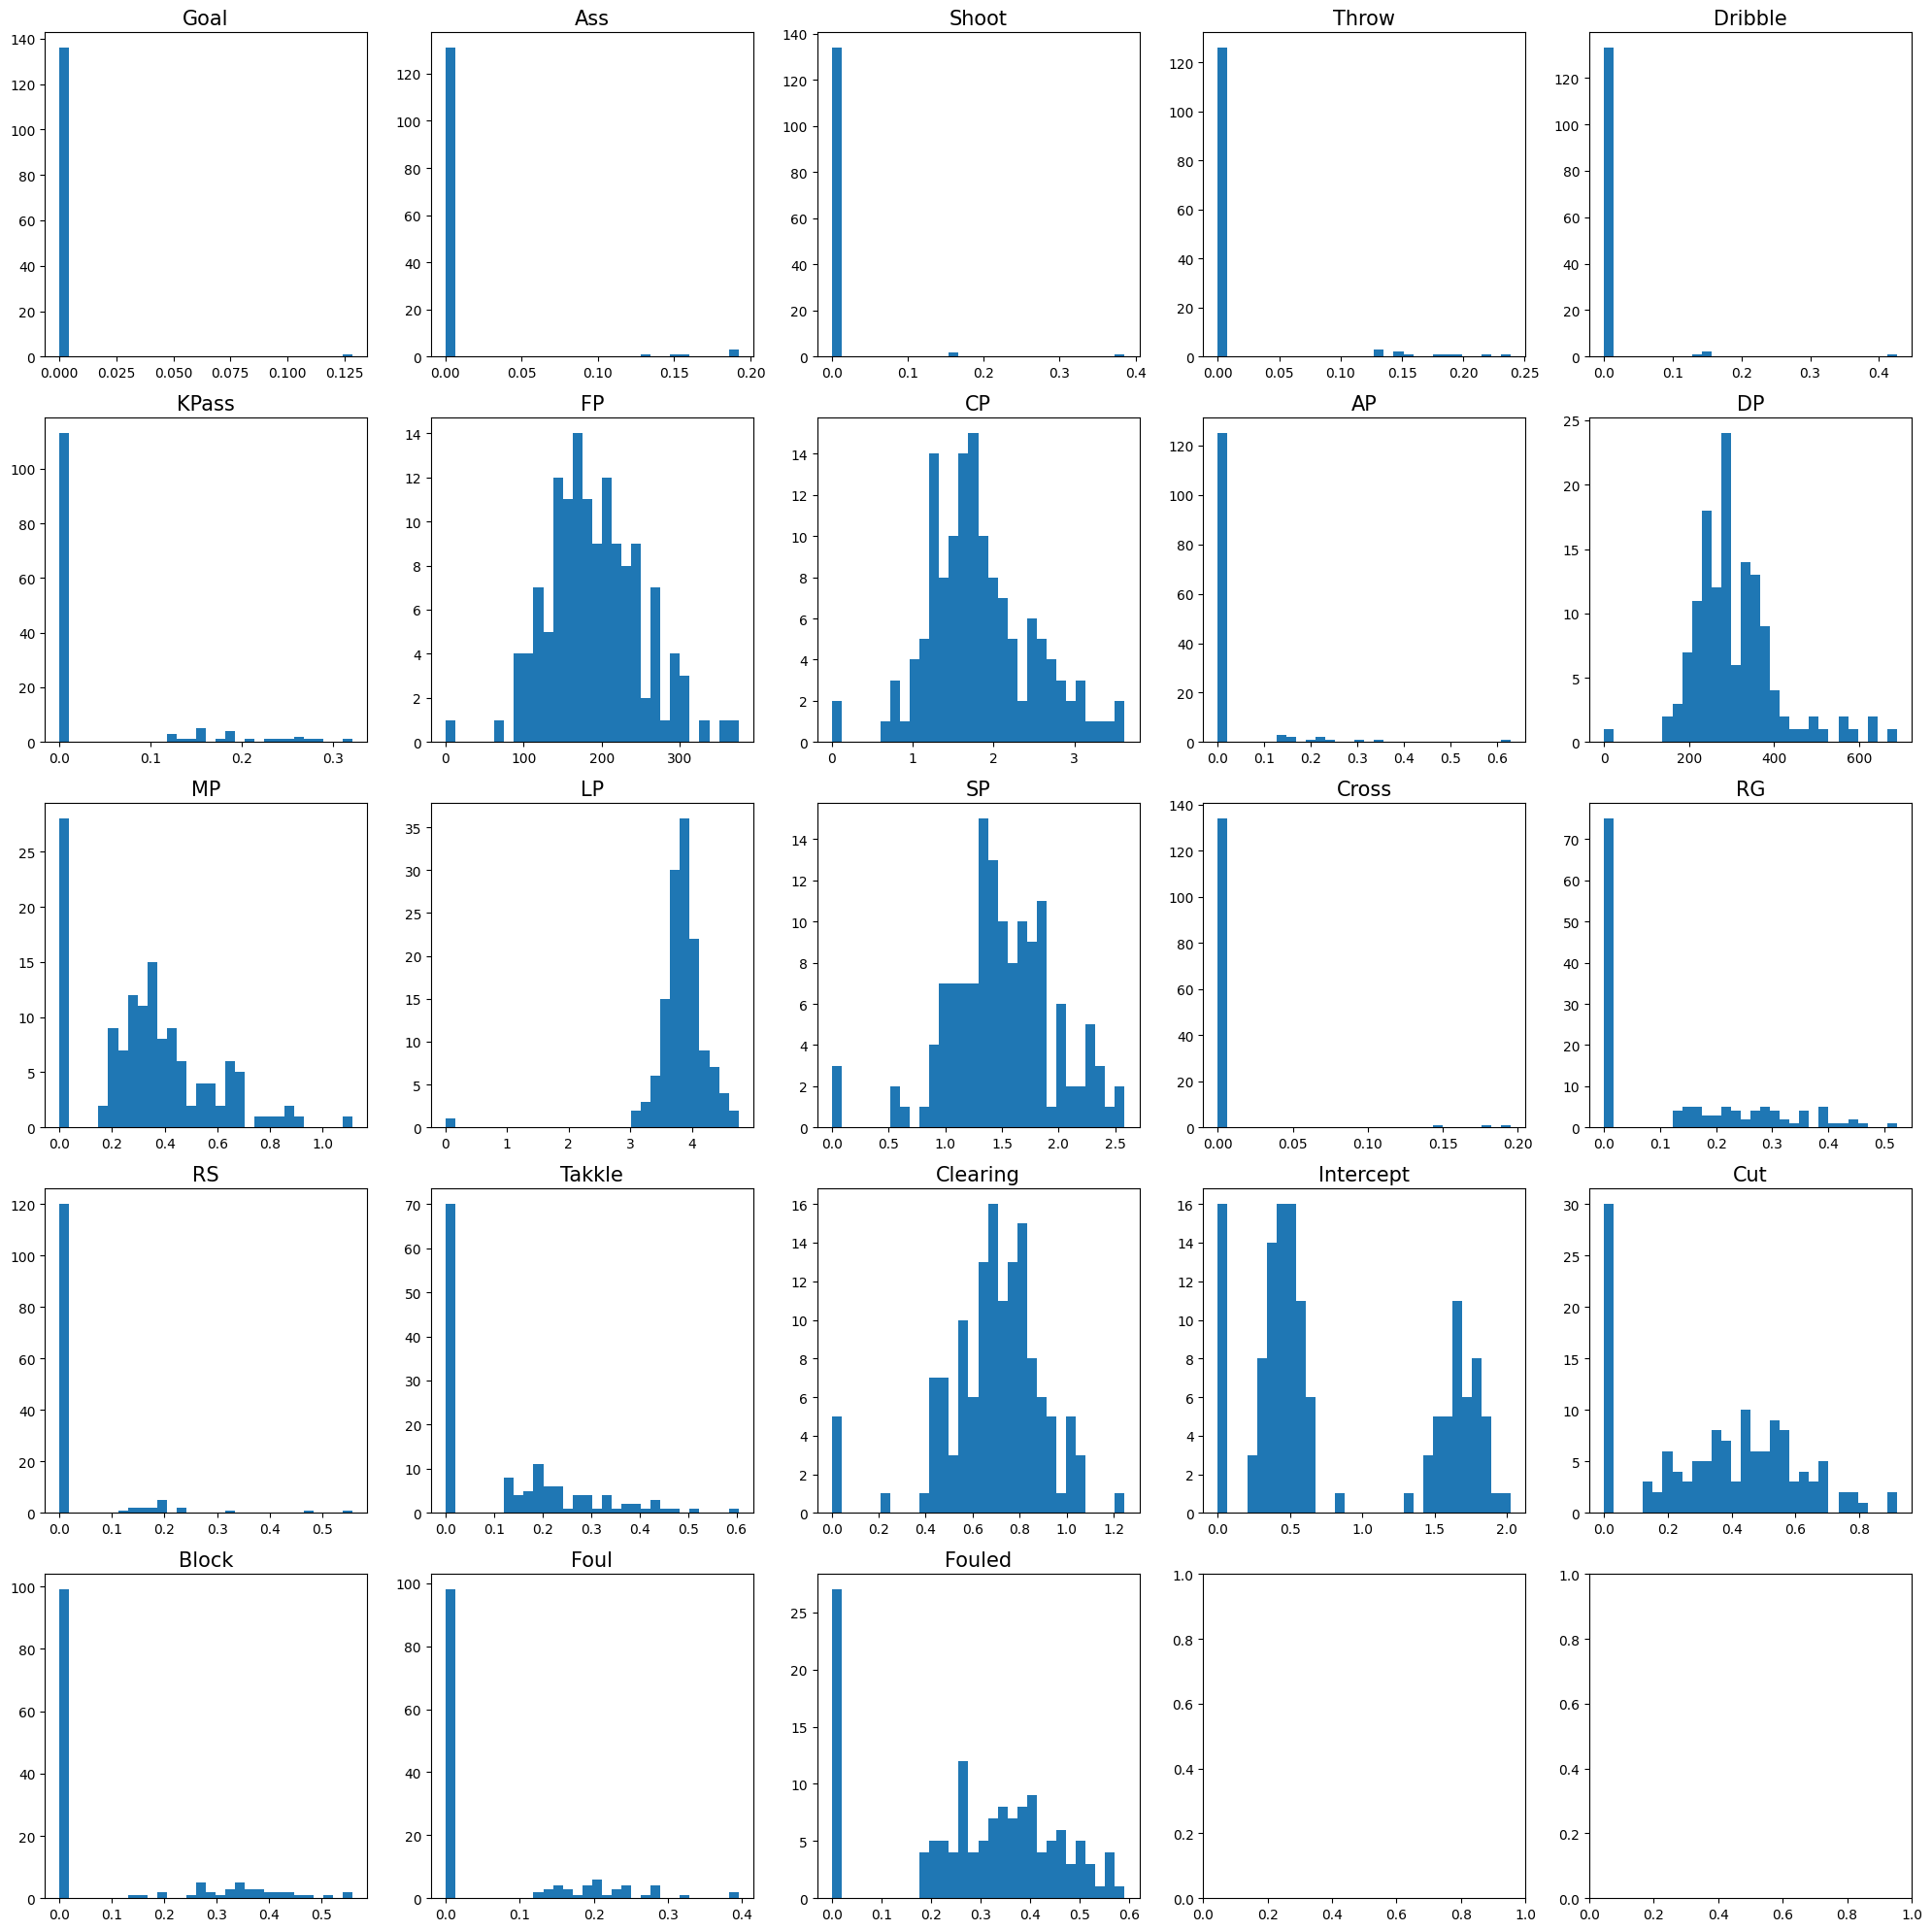

In [ ]:
# subplot 그리기
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# 각 subplot에 데이터 분포 그리기
for i, ax in enumerate(axs.flatten()):
    if i < len(X.columns):
        ax.hist(X.iloc[:, i], bins=30)
        ax.set_title(X.columns[i], fontsize=15)

plt.tight_layout()
plt.show()

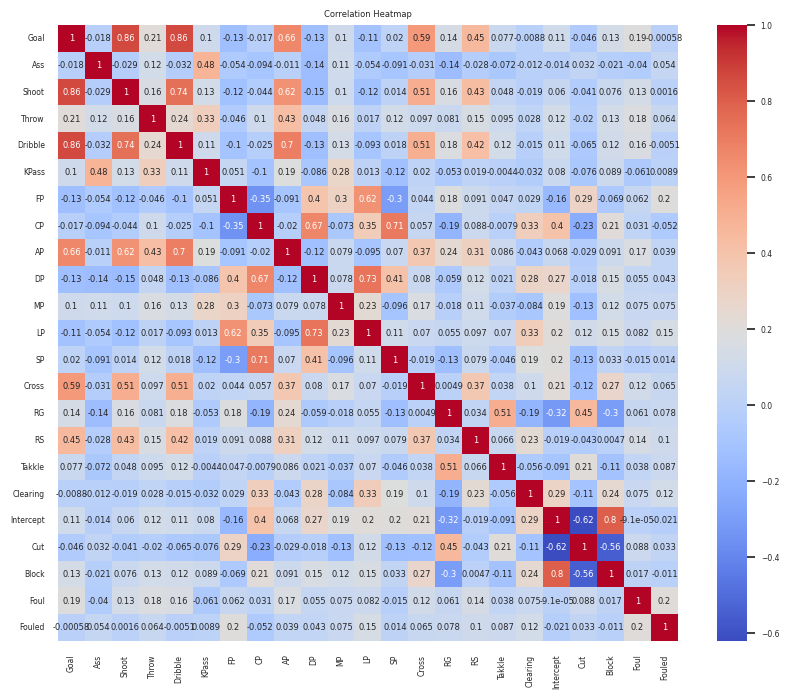

In [ ]:
# 상관관계 분석
corr = X.corr()

# 히트맵 그리기
sns.set(font_scale=0.5)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

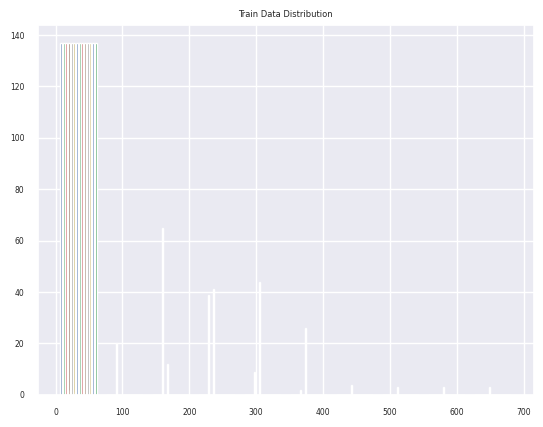

In [ ]:
# train 데이터 분포 시각화
plt.hist(X)
plt.title('Train Data Distribution')
plt.show()

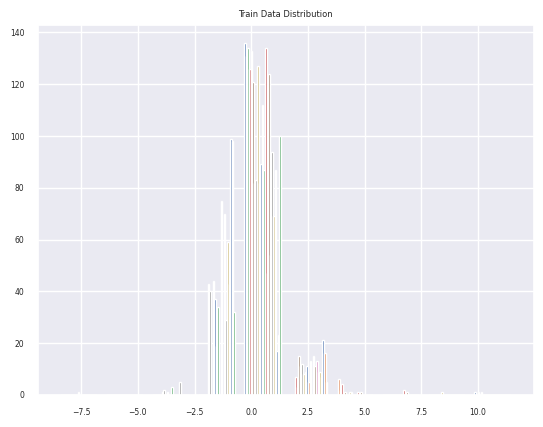

In [ ]:
# 입력 데이터의 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train 데이터 분포 시각화
plt.hist(X_scaled)
plt.title('Train Data Distribution')
plt.show()

# 딥러닝 - 6개

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 학습 데이터와 평가 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# 2. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# 5. 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/100
2/2 [==============================] - 2s 278ms/step - loss: 0.8227 - accuracy: 0.5780 - val_loss: 0.6306 - val_accuracy: 0.8571
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 0.7922 - accuracy: 0.5505 - val_loss: 0.5987 - val_accuracy: 0.8571
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 0.7775 - accuracy: 0.6422 - val_loss: 0.5679 - val_accuracy: 0.8571
Epoch 4/100
2/2 [==============================] - 0s 52ms/step - loss: 0.7391 - accuracy: 0.5780 - val_loss: 0.5418 - val_accuracy: 0.8929
Epoch 5/100
2/2 [==============================] - 0s 52ms/step - loss: 0.7472 - accuracy: 0.6055 - val_loss: 0.5185 - val_accuracy: 0.8929
Epoch 6/100
2/2 [==============================] - 0s 55ms/step - loss: 0.6276 - accuracy: 0.6422 - val_loss: 0.4963 - val_accuracy: 0.9286
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.7685 - accuracy: 0.5780 - val_loss: 0.4769 - val_accuracy: 0.9286
Epoch 8/100
2/2 [==

# 머신러닝 이용

## 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# DecisitonTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 1.0000


In [ ]:
y_np = np.array(y)
y_np[:5]

array(['Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper',
       'Goalkeeper'], dtype=object)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=y_np, feature_names=X.columns, impurity=True, filled=True)

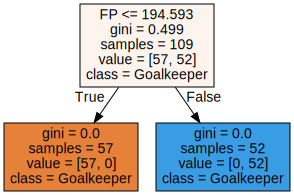

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances : 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Goal : 0.000
Ass : 0.000
Shoot : 0.000
Throw : 0.000
Dribble : 0.000
KPass : 0.000
FP : 1.000
CP : 0.000
AP : 0.000
DP : 0.000
MP : 0.000
LP : 0.000
SP : 0.000
Cross : 0.000
RG : 0.000
RS : 0.000
Takkle : 0.000
Clearing : 0.000
Intercept : 0.000
Cut : 0.000
Block : 0.000
Foul : 0.000
Fouled : 0.000


<Axes: >

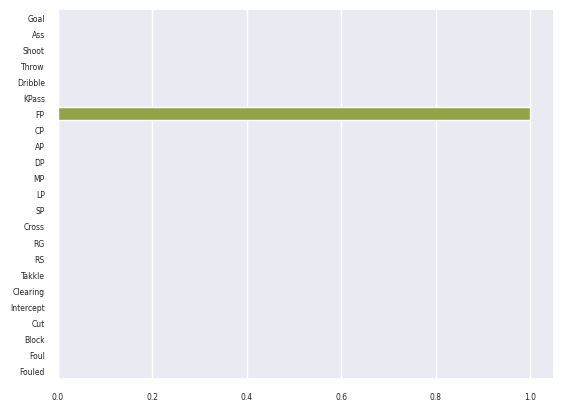

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# feature importance 추출
print('Feature importances : \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X.columns, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 columns 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=X.columns)

In [ ]:
# DecisionTreeClassifier 하이퍼 파라미터 추출
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : range(5, 25),
    'min_samples_split' : range(6, 25)
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
{'max_depth': 7, 'min_samples_split': 6}
0.9251989904872839


## 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=77)

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
np.round(accuracy, 3)

0.976

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : range(6, 25),
    'min_samples_leaf' : range(1, 25),
    'min_samples_split' : range(6, 25)
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적의 하이퍼 파라미터 :', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 14}
최고 예측 정확도 : 0.9606


## 앙상블 학습

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=2)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
np.round(accuracy_score(y_test, pred), 3)

0.882

In [ ]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.8346
KNeighborsClassifier 정확도 : 0.8268


# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=77)

gb_clf = GradientBoostingClassifier(random_state=7)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

gb_accuracy

0.968503937007874